In [2]:
# notebooks/eda_news.ipynb

import pandas as pd

# Load the news dataset
df_news = pd.read_csv('../data/raw_analyst_ratings.csv')

# Drop Unnamed: 0 column
df_news = df_news.drop(columns=['Unnamed: 0'])

# Inspect the dataset
print("Dataset Info:")
print(df_news.info())
print("\nMissing Values:")
print(df_news.isnull().sum())
print("\nFirst 5 Rows:")
print(df_news.head())


# Parse date column and convert to UTC (if not already)


df_news['date'] = pd.to_datetime(df_news['date'], utc=True, format="mixed")


# Check date conversion
print("\nDate Column (First 5):")
print(df_news['date'].head())

# Verify unique tickers
print("\nUnique Stock Tickers:")
print(df_news['stock'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB
None

Missing Values:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

First 5 Rows:
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https:


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Top 5 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


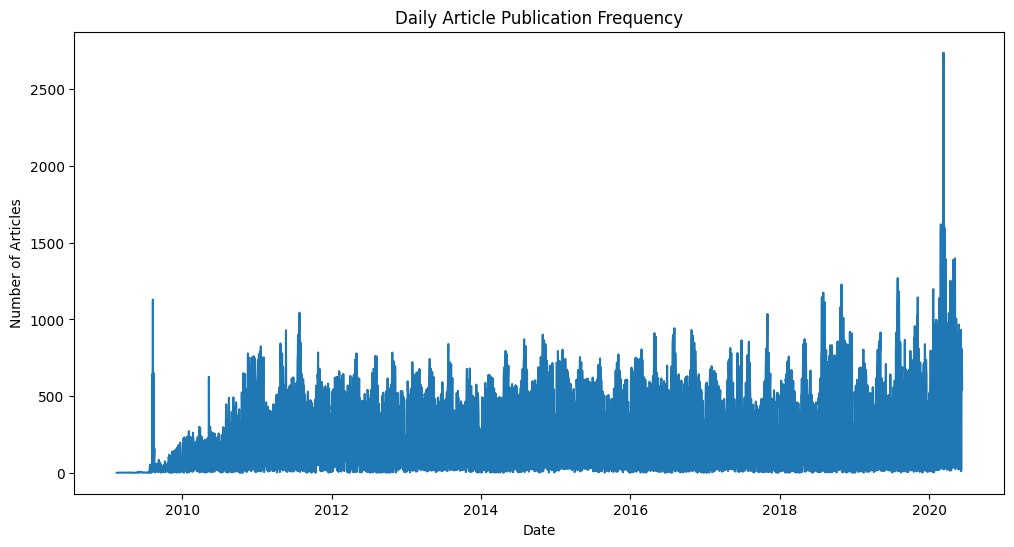

In [2]:
# Descriptive Statistics

# Headline length
df_news['headline_length'] = df_news['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(df_news['headline_length'].describe())

# Articles per publisher
publisher_counts = df_news['publisher'].value_counts()
print("\nTop 5 Publishers by Article Count:")
print(publisher_counts.head())

# Publication date trends
df_news['date_only'] = df_news['date'].dt.date
daily_counts = df_news['date_only'].value_counts().sort_index()

# Plot daily publication frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

[nltk_data] Downloading package punkt to /home/smuca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/smuca/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/smuca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 5 Common Words in Headlines:
[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140)]


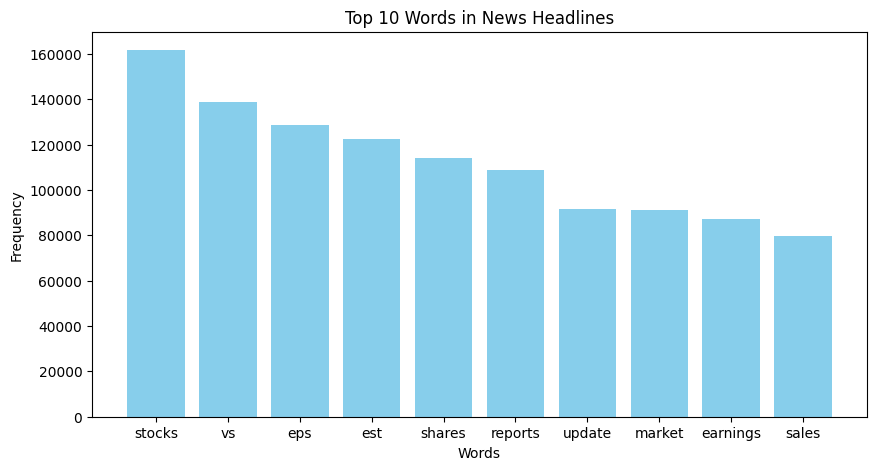

In [3]:
# Text Analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter



# Ensure both punkt and punkt_tab are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Explicitly add your nltk_data directory if you use a custom path
# nltk.data.path.append('./nltk_data')  # Uncomment if using local nltk_data folder


# Preprocess text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df_news['tokens'] = df_news['headline'].apply(preprocess_text)
all_tokens = [token for tokens in df_news['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
print("\nTop 5 Common Words in Headlines:")
print(word_freq.most_common(5))

# Visualize top words
top_words = dict(word_freq.most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.title('Top 10 Words in News Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Daily Article Counts (Overall):
count    3955.000000
mean      355.835145
std       281.533761
min         1.000000
25%        33.000000
50%       407.000000
75%       551.000000
max      2739.000000
Name: count, dtype: float64

Daily Article Counts (Filtered Tickers):
count    1357.000000
mean        5.402358
std         8.869519
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       127.000000
Name: count, dtype: float64


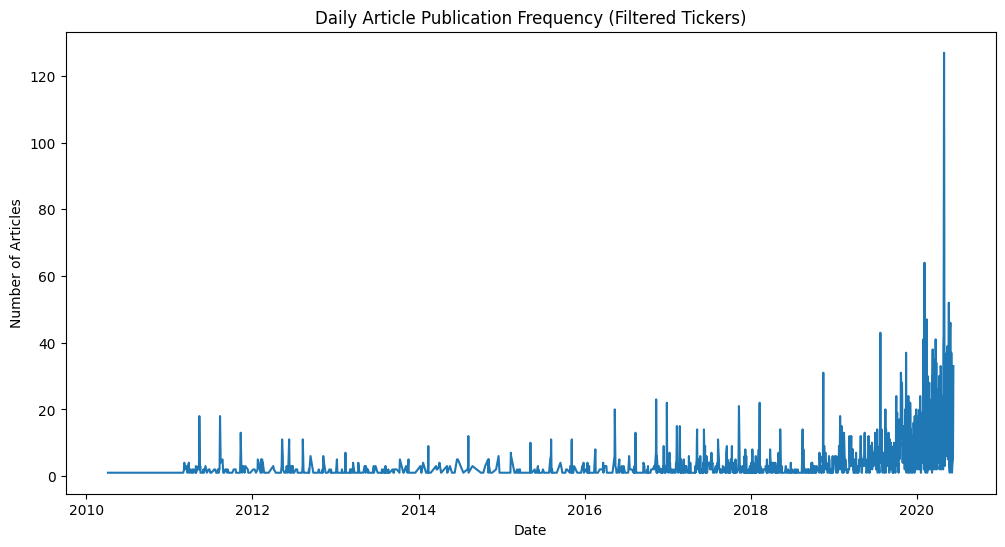

In [3]:
# Time Series Analysis (Daily)
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date_only is available (from previous step)
# If not, recompute
df_news['date_only'] = df_news['date'].dt.date

# Filter for relevant tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'FB', 'MSF', 'NVDA', 'TSLA']
df_news_filtered = df_news[df_news['stock'].isin(tickers)]

# Daily publication frequency (overall)
daily_counts = df_news['date_only'].value_counts().sort_index()

# Daily publication frequency (filtered tickers)
daily_counts_filtered = df_news_filtered['date_only'].value_counts().sort_index()

# Print daily counts summary
print("\nDaily Article Counts (Overall):")
print(daily_counts.describe())
print("\nDaily Article Counts (Filtered Tickers):")
print(daily_counts_filtered.describe())

# Plot daily publication frequency (filtered tickers)
plt.figure(figsize=(12, 6))
daily_counts_filtered.plot()
plt.title('Daily Article Publication Frequency (Filtered Tickers)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

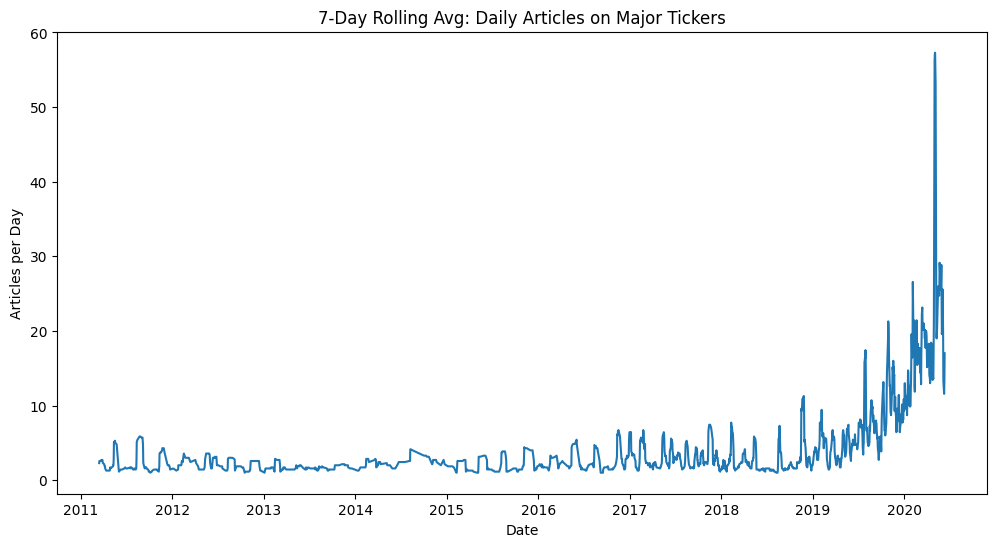

In [10]:
plt.figure(figsize=(12, 6))
daily_counts_filtered.rolling(7).mean().plot()
plt.title('7-Day Rolling Avg: Daily Articles on Major Tickers')
plt.xlabel('Date')
plt.ylabel('Articles per Day')
plt.show()


stock       AAPL  AMZN  FB  GOOG  MSF  NVDA  TSLA
date_only                                        
2020-06-04     0     0   0     1    0     0     0
2020-06-05     0     0   0     3    0     0     0
2020-06-08     0     0   1     1    0     3     0
2020-06-09     4     4   4     2    0     1     0
2020-06-10     6     6   5     3    0     3    10


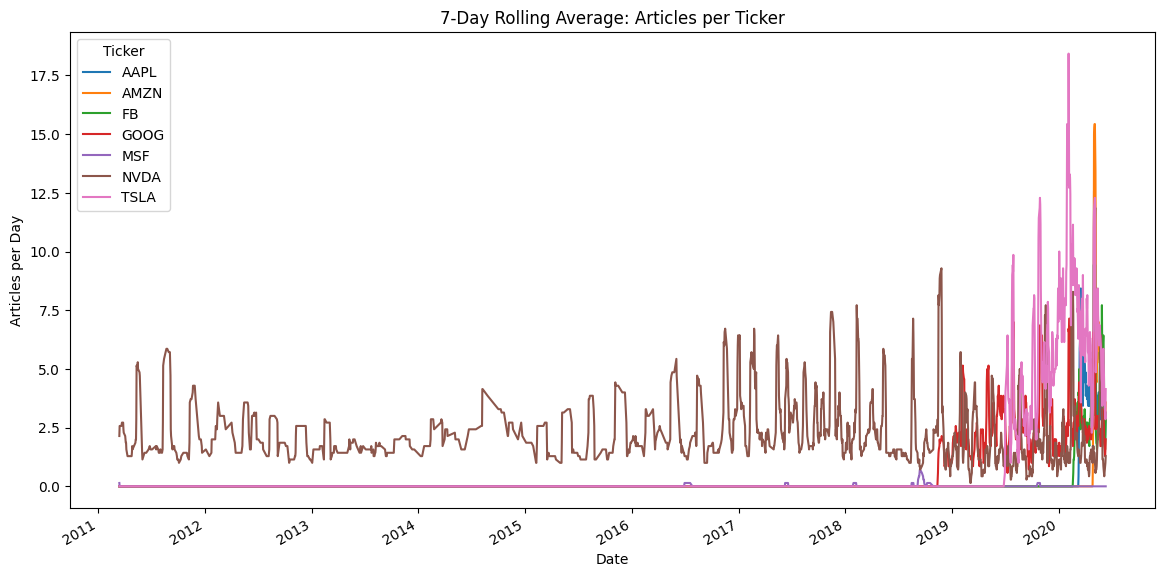

In [9]:
df_news_filtered = df_news_filtered.copy()
df_news_filtered['date_only'] = pd.to_datetime(df_news_filtered['date_only'])

ticker_daily = (
    df_news_filtered
    .groupby(['date_only', 'stock'])
    .size()
    .unstack(fill_value=0) 
)

print(ticker_daily.tail(5))
ticker_daily.rolling(window=7).mean().plot(figsize=(14, 7))
plt.title('7-Day Rolling Average: Articles per Ticker')
plt.xlabel('Date')
plt.ylabel('Articles per Day')
plt.legend(title='Ticker')
plt.show()



Top 5 Publisher Domains (Filtered Tickers):
publisher_domain
Benzinga Newsdesk    1688
Lisa Levin            650
Charles Gross         461
Benzinga_Newsdesk     310
Wayne Duggan          299
Name: count, dtype: int64


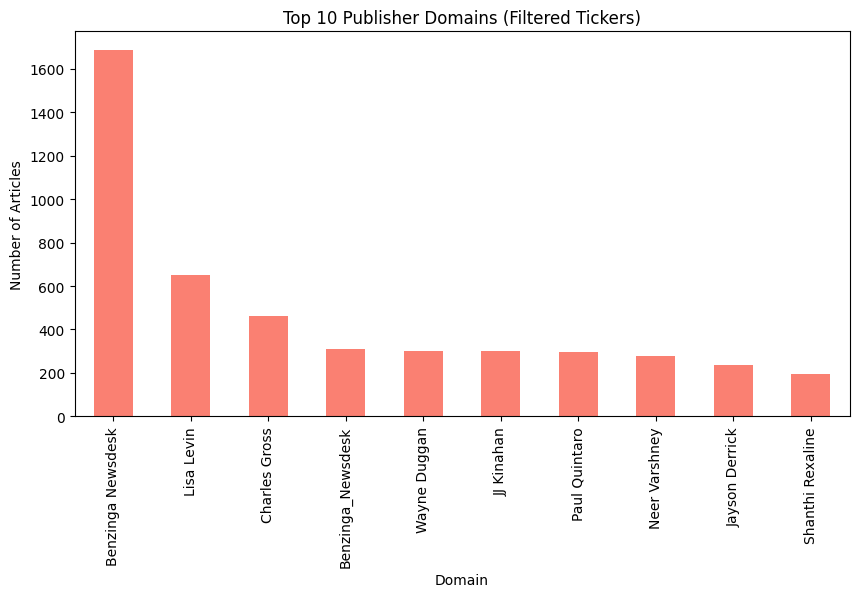

In [19]:
# Publisher Analysis
def extract_domain(publisher):
    if '@' in publisher:
        return publisher.split('@')[1]
    return publisher

# Apply domain extraction to filtered dataset
df_news_filtered['publisher_domain'] = df_news_filtered['publisher'].apply(extract_domain)
domain_counts = df_news_filtered['publisher_domain'].value_counts()
print("\nTop 5 Publisher Domains (Filtered Tickers):")
print(domain_counts.head())

# Visualize top domains
plt.figure(figsize=(10, 5))
domain_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Publisher Domains (Filtered Tickers)')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.show()